# Análise Exploratória de Produto do Mercado Livre

## 1. Imports

In [1]:
import sys

In [2]:
import requests
import json
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

## 2. Carregar os Dados

In [3]:
consulta_ml = requests.get("https://api.mercadolibre.com/sites/MLB/search?q=cofre")
consulta_ml = consulta_ml.json()

## 3. Exploração dos Dados

In [4]:
#print(consulta_ml) # coloquei como comentário para não poluir no GitHub

{'site_id': 'MLB', 'country_default_time_zone': 'GMT-03:00', 'query': 'cofre', 'paging': {'total': 11211, 'primary_results': 1000, 'offset': 0, 'limit': 50}, 'results': [{'id': 'MLB3059005282', 'title': 'Cofre Eletrônico Digital Em Aço Teclado Senha + 2 Chaves 23x17x17 Forkis Fk-cf007 ', 'condition': 'new', 'thumbnail_id': '878844-MLA52871550631_122022', 'catalog_product_id': 'MLB20692931', 'listing_type_id': 'gold_special', 'permalink': 'https://www.mercadolivre.com.br/cofre-eletrnico-digital-em-aco-teclado-senha-2-chaves-23x17x17-forkis-fk-cf007/p/MLB20692931', 'buying_mode': 'buy_it_now', 'site_id': 'MLB', 'category_id': 'MLB33430', 'domain_id': 'MLB-SAFES', 'thumbnail': 'http://http2.mlstatic.com/D_878844-MLA52871550631_122022-I.jpg', 'currency_id': 'BRL', 'order_backend': 1, 'price': 133.12, 'original_price': 179.9, 'sale_price': None, 'available_quantity': 500, 'official_store_id': None, 'use_thumbnail_id': True, 'accepts_mercadopago': True, 'shipping': {'store_pick_up': False, '

In [5]:
print(type(consulta_ml))

<class 'dict'>


In [6]:
for chave, valor in consulta_ml.items():
    if valor is None:
        print(f"O valor associado à chave '{chave}' é nulo (None)")
    else:
        print("Não há valores nulos")

Não há valores nulos
Não há valores nulos
Não há valores nulos
Não há valores nulos
Não há valores nulos
Não há valores nulos
Não há valores nulos
Não há valores nulos
Não há valores nulos
Não há valores nulos


In [7]:
def percorrer_dicionario(dicionario, nivel=0):
    for chave, valor in dicionario.items():
        print('  ' * nivel + str(chave) + ':', end=' ')
        if isinstance(valor, dict):
            print() 
            percorrer_dicionario(valor, nivel + 1)  
        else:
            print(valor)  
            
# percorrer_dicionario(consulta_ml) # coloquei como comentário para não poluir no GitHub


site_id: MLB
country_default_time_zone: GMT-03:00
query: cofre
paging: 
  total: 11211
  primary_results: 1000
  offset: 0
  limit: 50
results: [{'id': 'MLB3059005282', 'title': 'Cofre Eletrônico Digital Em Aço Teclado Senha + 2 Chaves 23x17x17 Forkis Fk-cf007 ', 'condition': 'new', 'thumbnail_id': '878844-MLA52871550631_122022', 'catalog_product_id': 'MLB20692931', 'listing_type_id': 'gold_special', 'permalink': 'https://www.mercadolivre.com.br/cofre-eletrnico-digital-em-aco-teclado-senha-2-chaves-23x17x17-forkis-fk-cf007/p/MLB20692931', 'buying_mode': 'buy_it_now', 'site_id': 'MLB', 'category_id': 'MLB33430', 'domain_id': 'MLB-SAFES', 'thumbnail': 'http://http2.mlstatic.com/D_878844-MLA52871550631_122022-I.jpg', 'currency_id': 'BRL', 'order_backend': 1, 'price': 133.12, 'original_price': 179.9, 'sale_price': None, 'available_quantity': 500, 'official_store_id': None, 'use_thumbnail_id': True, 'accepts_mercadopago': True, 'shipping': {'store_pick_up': False, 'free_shipping': True, 'lo

In [8]:
print("O produto pesquisado é:",consulta_ml['query'])
print("Total de produtos anunciados:",consulta_ml['paging']['total'])
print("Total de produtos listados na primeira página:",consulta_ml['paging']['limit'])

O produto pesquisado é: cofre
Total de produtos anunciados: 11211
Total de produtos listados na primeira página: 50


 Vemos que os dados estão estruturados em um arquivo JSON em que o formato que a gente trabalha aqui dentro do Python é dicionário. O arquivo contém as informações gerais nas primeiras linhas e depois dentro de uma lista com dicionários chamada "Results", temos os 50 resultados que são disponibilizados pela pesquisa quando alguém consulta o ML, mas podemos ver que o total de produtos anunciados de acordo com a pesquisa é de 10.972

## 3. Exploração das Variáveis

A exploração das variáveis vai ser dentro da aba "Results" que mostra o resultado da pesquisa, com 50 produtos anunciados mas com nem todos eles com as variáveis buscadas bem estruturadas dentro do documento. Nem todos os produtos anunciados possuem as variáveis que estamos buscando definidas.

   ### 3.1 Preço dos itens

In [9]:
# preco = consulta_ml['results'][0]['price']
# preco


precos = []
for resultado in consulta_ml['results']:
    preco = resultado['price']
    precos.append(preco)

#print(precos)

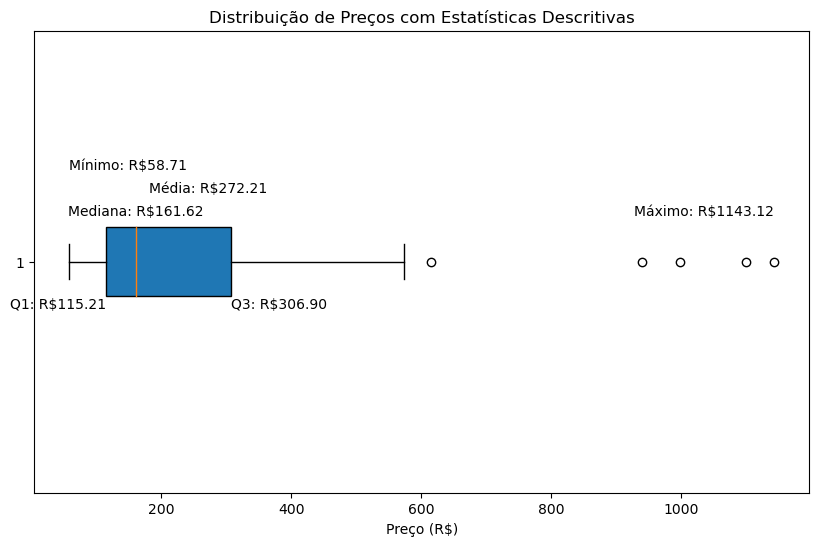

In [10]:
media = np.mean(precos)
mediana = np.median(precos)
minimo = np.min(precos)
maximo = np.max(precos)
q1, q2, q3 = np.percentile(precos, [25, 50, 75])

plt.figure(figsize=(10, 6))
plt.boxplot(precos, vert=False, patch_artist=True)
plt.xlabel('Preço (R$)')
plt.title('Distribuição de Preços com Estatísticas Descritivas')

plt.text(maximo, 1.1, f'Máximo: R${maximo:.2f}', fontsize=10, ha='right')
plt.text(minimo, 1.2, f'Mínimo: R${minimo:.2f}', fontsize=10, ha='left')
plt.text(q1, 0.9, f'Q1: R${q1:.2f}', fontsize=10, ha='right')
plt.text(q3, 0.9, f'Q3: R${q3:.2f}', fontsize=10, ha='left')
plt.text(media, 1.15, f'Média: R${media:.2f}', fontsize=10, ha='center')
plt.text(mediana, 1.1, f'Mediana: R${mediana:.2f}', fontsize=10, ha='center')

plt.show()

Como podemos ver no boxplot a maior parte dos preços dos produtos estão concentrados (50%) entre 115.21 e 306.8 . Vemos também que os produtos com preços altos como próximo do peso máximo na amostra, são outliers, ou seja, minoria no conjunto de dados. A média de preços está em 257.7, já a mediana em 161.62, então vemos que boa parte dos preços estão de fato situados em valores menores.

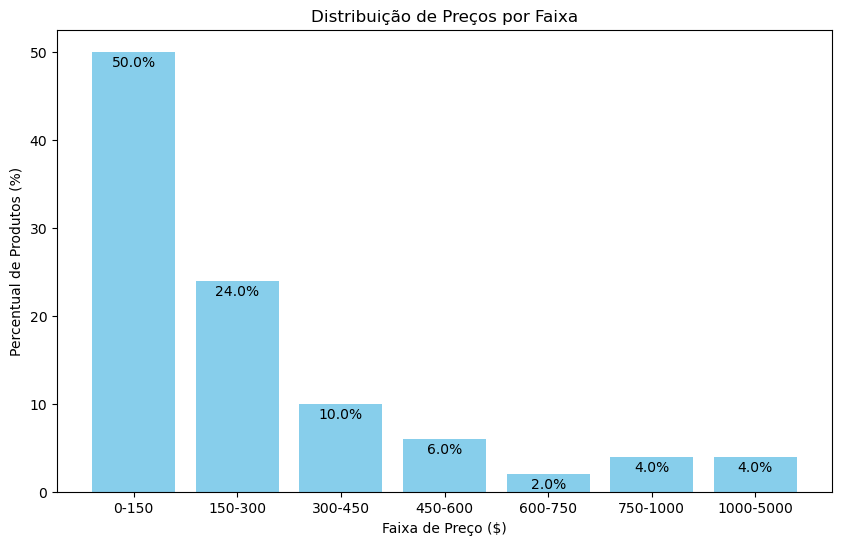

In [11]:
faixas_preco = [(0, 150), (150, 300), (300, 450), (450, 600), (600, 750), (750, 1000),(1000, 5000)]

contagem_por_faixa = [sum(1 for preco in precos if faixa[0] <= preco < faixa[1]) for faixa in faixas_preco]

total_produtos = len(precos)

percentual_por_faixa = [round((contagem / total_produtos),2) * 100 for contagem in contagem_por_faixa]

labels_faixas = [f'{faixa[0]}-{faixa[1]}' for faixa in faixas_preco]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels_faixas, percentual_por_faixa, color='skyblue')

for bar, percentual in zip(bars, percentual_por_faixa):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 2, f'{percentual}%', 
             ha='center', va='bottom', color='black', fontsize=10)

plt.title('Distribuição de Preços por Faixa')
plt.xlabel('Faixa de Preço ($)')
plt.ylabel('Percentual de Produtos (%)')

plt.show()

Vemos que a maioria dos produtos tem preços na faixa de até 150 (arredondando) e que acima de 300 a quantidade de produtos vai decrescendo gradativamente

### 3.2 Estoques

In [12]:
estoques = []

for a in consulta_ml['results']:
    estoque = a['available_quantity']
    estoques.append(estoque)

#print(estoques)

#estoques.count(200)

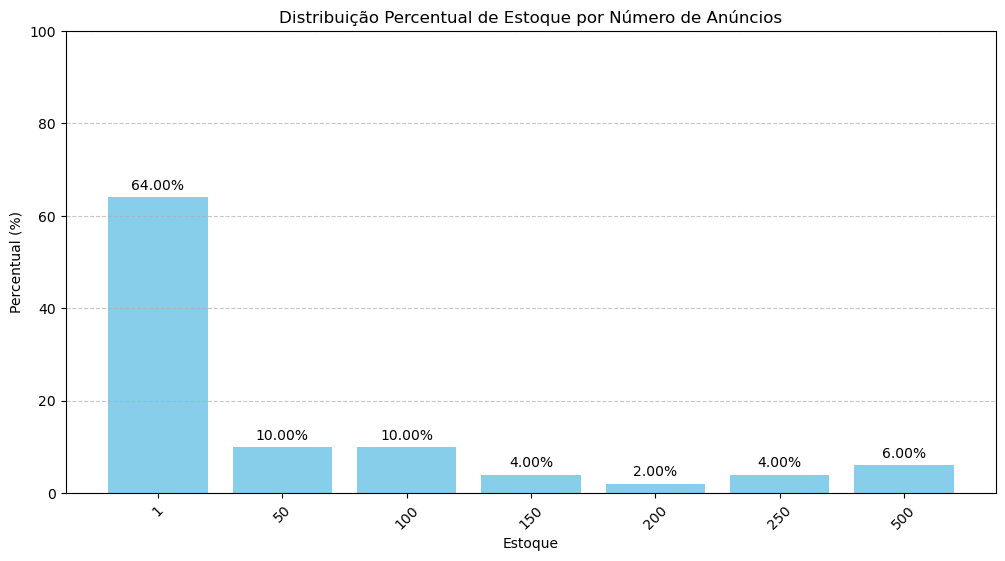

In [13]:
ocorrencias = Counter(estoques)

total_anuncios = len(estoques)

percentuais = {valor: (ocorrencias[valor] / total_anuncios) * 100 for valor in ocorrencias}

valores_ordenados = sorted(percentuais.keys())

plt.figure(figsize=(12, 6))
plt.bar([str(valor) for valor in valores_ordenados], [percentuais[valor] for valor in valores_ordenados], color='skyblue')
plt.xlabel('Estoque')
plt.ylabel('Percentual (%)')
plt.title('Distribuição Percentual de Estoque por Número de Anúncios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.ylim(0, 100)

for i, valor in enumerate(valores_ordenados):
    percentual = percentuais[valor]
    plt.text(i, percentual + 1, f'{percentual:.2f}%', ha='center', va='bottom')

plt.show()

Vemos que por alguma razão 68% dos produtos tem estoque de apenas 1 produto. Algo preocupante visto que isso pode afetar diretamente nas vendas dos vendedores do ML e afetar possíveis compradores que desejam adquirir mais de um produto

### 3.3 Cor dos itens

In [14]:
resultados = consulta_ml['results']

In [15]:
cores = []

for produto in resultados:
    for atributo in produto['attributes']:
        if atributo['id'] == 'COLOR':
            cores.append(atributo['value_name'])

print(cores)
len(cores)

['Preto', 'Preto', 'Preto', 'Preto', 'Preto', 'Preto', 'Preto', 'Preto', 'Preto', 'Preto', 'Preto', 'Cinza', 'Preto', 'Preto', 'Cinza', 'Cinza', 'Preto', 'Preto', 'Preto-Prata', 'Preto', 'Preto', 'Preto', 'Cinza', 'Preto', 'Branco', 'Preto', 'Vermelho', 'Cinza-escuro', 'Branco', 'Preto', 'París', 'Cinza-escuro', 'Prateado', 'Areia', 'Preto', 'Preto', 'Preto', 'Preto', 'Cinza', 'Rosa', 'Azul', 'Preto', 'Preto']


43

Vemos que para a variável como cor não temos todas as correspondências dos 50 produtos anunciados

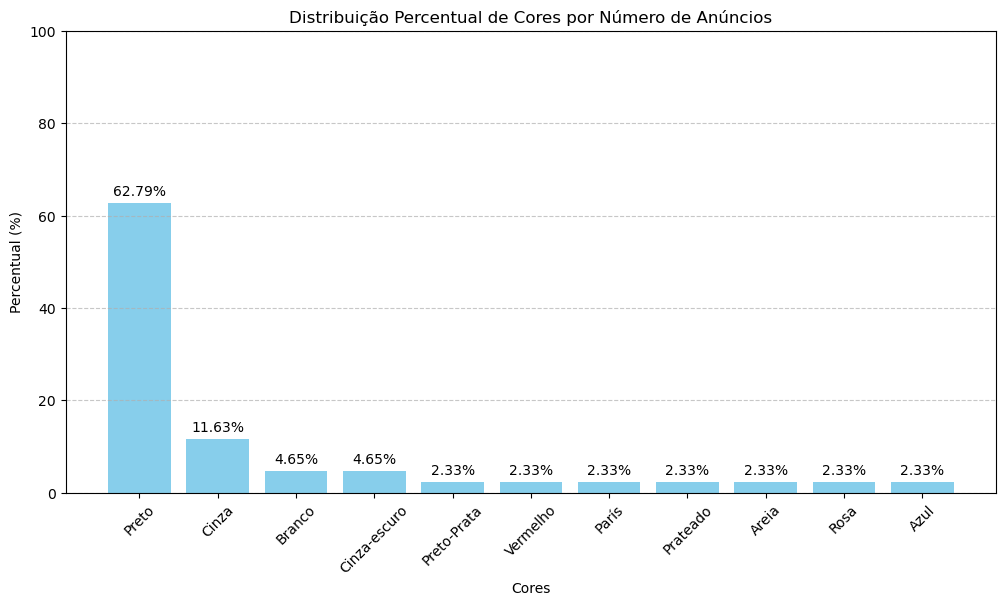

In [16]:
ocorrencias_cores = Counter(cores)

total_cores = len(cores)

percentuais_cores = {cor: (ocorrencias_cores[cor] / total_cores) * 100 for cor in ocorrencias_cores}

valores_ordenados_cores = sorted(percentuais_cores.items(), key=lambda x: x[1], reverse=True)

cores_ordenadas = [str(cor[0]) for cor in valores_ordenados_cores]
percentuais_ordenados = [cor[1] for cor in valores_ordenados_cores]

plt.figure(figsize=(12, 6))
plt.bar(cores_ordenadas, percentuais_ordenados, color='skyblue')
plt.xlabel('Cores')
plt.ylabel('Percentual (%)')
plt.title('Distribuição Percentual de Cores por Número de Anúncios')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.ylim(0, 100)

for i, percentual in enumerate(percentuais_ordenados):
    plt.text(i, percentual + 1, f'{percentual:.2f}%', ha='center', va='bottom')

plt.show()

Vemos que boa parte dos produtos são da cor preta (68,4%), seguidos da cor cinza (18,4%). O restante das cores representa uma baixa quantidade de produtos. Mostra que possívelmente a cor não é um parâmetro extremamente relevante no momento da compra

### 3.4 Condição 

In [17]:
condicao = []
for c in consulta_ml['results']:
    condicoes = c['condition']
    condicao.append(condicoes)

# Imprimir a lista de preços
print(condicao)



['new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new', 'new']


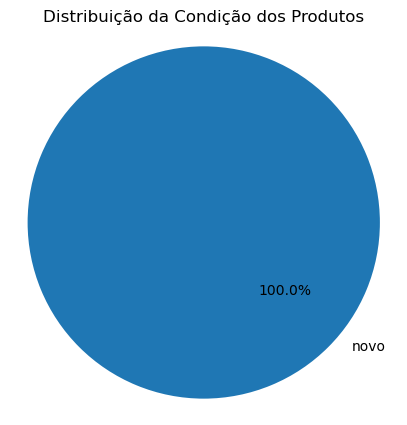

In [18]:
contagem_condicoes = {'novo': len(condicao)}

labels = contagem_condicoes.keys()
sizes = contagem_condicoes.values()

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição da Condição dos Produtos')
plt.axis('equal')  # Assegura que o gráfico de pizza é desenhado como um círculo

plt.show()

Os produtos são todos novos

### 3.5 Peso 

In [19]:
resultados = consulta_ml["results"]
resultados[0]


{'id': 'MLB3059005282',
 'title': 'Cofre Eletrônico Digital Em Aço Teclado Senha + 2 Chaves 23x17x17 Forkis Fk-cf007 ',
 'condition': 'new',
 'thumbnail_id': '878844-MLA52871550631_122022',
 'catalog_product_id': 'MLB20692931',
 'listing_type_id': 'gold_special',
 'permalink': 'https://www.mercadolivre.com.br/cofre-eletrnico-digital-em-aco-teclado-senha-2-chaves-23x17x17-forkis-fk-cf007/p/MLB20692931',
 'buying_mode': 'buy_it_now',
 'site_id': 'MLB',
 'category_id': 'MLB33430',
 'domain_id': 'MLB-SAFES',
 'thumbnail': 'http://http2.mlstatic.com/D_878844-MLA52871550631_122022-I.jpg',
 'currency_id': 'BRL',
 'order_backend': 1,
 'price': 133.12,
 'original_price': 179.9,
 'sale_price': None,
 'available_quantity': 500,
 'official_store_id': None,
 'use_thumbnail_id': True,
 'accepts_mercadopago': True,
 'shipping': {'store_pick_up': False,
  'free_shipping': True,
  'logistic_type': 'fulfillment',
  'mode': 'me2',
  'tags': ['fulfillment', 'self_service_in', 'mandatory_free_shipping'],
 

In [20]:
pesos = []

for produto in resultados:
    for atributo in produto['attributes']:
        if atributo['name'] == 'Peso':
            pesos.append(atributo['value_name'])

print(pesos)
len(pesos)

['2.4 kg', '4 kg', '14 kg', '2.87 kg', '4.3 kg', '6 kg', '4 kg', '12 kg', '4.35 kg', '3.5 kg', '7 kg', '14 kg', '575 g', '2.5 kg', '6.5 kg', '7 kg', '3 kg', '0.552 kg', '3.5 kg', '1.31 kg', '0.812 kg', '9.4 kg', '5 kg', '14 kg', '575 g', '1.31 kg', '0.65 kg']


27

In [21]:
def converter_para_kg(peso):
    if ' g' in peso:
        peso_em_g = float(peso.split()[0])
        peso_em_kg = peso_em_g / 1000  
        return f'{peso_em_kg:.2f} kg' 
    else:
        return peso

pesos_convertidos = [converter_para_kg(peso) for peso in pesos]


print(pesos_convertidos)
len(pesos_convertidos)

['2.4 kg', '4 kg', '14 kg', '2.87 kg', '4.3 kg', '6 kg', '4 kg', '12 kg', '4.35 kg', '3.5 kg', '7 kg', '14 kg', '0.57 kg', '2.5 kg', '6.5 kg', '7 kg', '3 kg', '0.552 kg', '3.5 kg', '1.31 kg', '0.812 kg', '9.4 kg', '5 kg', '14 kg', '0.57 kg', '1.31 kg', '0.65 kg']


27

In [22]:
pesos_em_kg = []

for peso in pesos_convertidos:
    if 'kg' in peso:
        peso_em_kg = peso.replace(' kg', '')
        pesos_em_kg.append(float(peso_em_kg))
    else:
        None

print(pesos_em_kg)
len(pesos_em_kg)
# min(pesos_em_kg)
# max(pesos_em_kg)

[2.4, 4.0, 14.0, 2.87, 4.3, 6.0, 4.0, 12.0, 4.35, 3.5, 7.0, 14.0, 0.57, 2.5, 6.5, 7.0, 3.0, 0.552, 3.5, 1.31, 0.812, 9.4, 5.0, 14.0, 0.57, 1.31, 0.65]


27

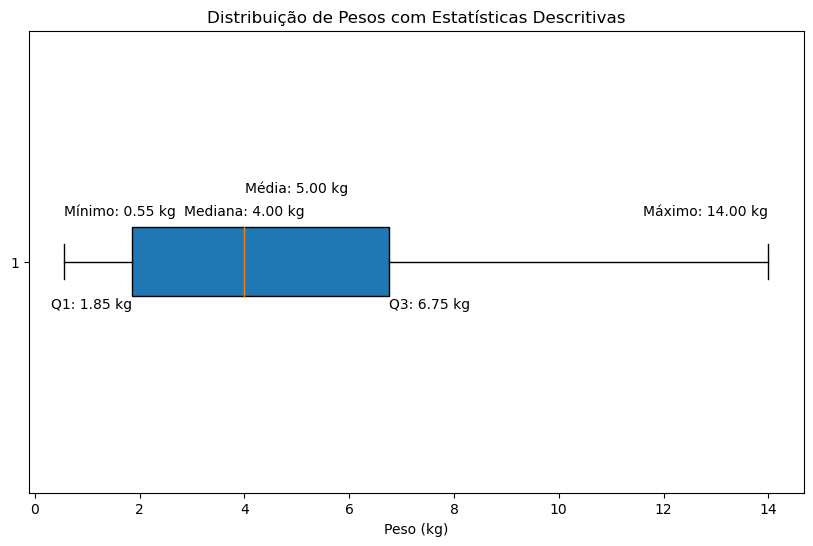

In [23]:
media = np.mean(pesos_em_kg)
mediana = np.median(pesos_em_kg)
minimo = np.min(pesos_em_kg)
maximo = np.max(pesos_em_kg)
q1, q2, q3 = np.percentile(pesos_em_kg, [25, 50, 75])

plt.figure(figsize=(10, 6))
plt.boxplot(pesos_em_kg, vert=False, patch_artist=True)
plt.xlabel('Peso (kg)')
plt.title('Distribuição de Pesos com Estatísticas Descritivas')

plt.text(maximo, 1.1, f'Máximo: {maximo:.2f} kg', fontsize=10, ha='right')
plt.text(minimo, 1.1, f'Mínimo: {minimo:.2f} kg', fontsize=10, ha='left')
plt.text(q1, 0.9, f'Q1: {q1:.2f} kg', fontsize=10, ha='right')
plt.text(q3, 0.9, f'Q3: {q3:.2f} kg', fontsize=10, ha='left')
plt.text(media, 1.15, f'Média: {media:.2f} kg', fontsize=10, ha='center')
plt.text(mediana, 1.1, f'Mediana: {mediana:.2f} kg', fontsize=10, ha='center')

plt.show()

Como podemos ver no boxplot a maior parte dos pesos dos produtos estão concentrados (50%) entre 1.58kg e 5.75kg. Vemos também que os produtos com pesos altos como próximo do peso máximo na amostra, são outliers, ou seja, minoria no conjunto de dados. A média de pesos está em 4.65kg, já a mediana em 3.75kg, então vemos que a amplitude maior em relação a pesos maiores provavelmente está puxando a média um pouco pra cima (os outliers ajudam também).

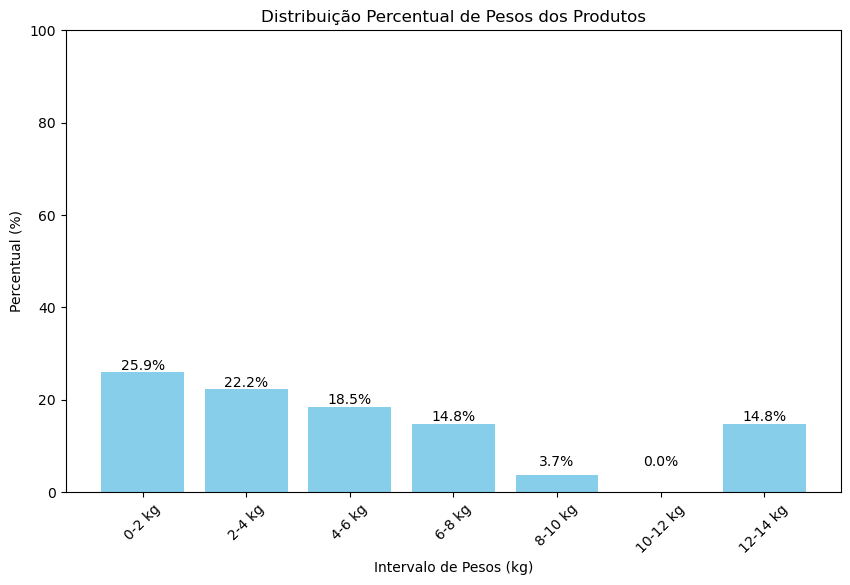

In [24]:
bins = [0, 2, 4, 6, 8, 10, 12, 14]

percentual_por_intervalo, _ = np.histogram(pesos_em_kg, bins=bins, density=False)

total_produtos = len(pesos_em_kg)
percentual_por_intervalo = percentual_por_intervalo / total_produtos * 100

labels = [f'{bins[i]}-{bins[i+1]} kg' for i in range(len(bins)-1)]
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, percentual_por_intervalo, color='skyblue')
plt.xlabel('Intervalo de Pesos (kg)')
plt.ylabel('Percentual (%)')
plt.title('Distribuição Percentual de Pesos dos Produtos')
plt.ylim(0, 100)  

for bar, percentual in zip(bars, percentual_por_intervalo):
    y_pos = max(bar.get_height(), 5)  # Ajusta a posição vertical do rótulo
    plt.text(bar.get_x() + bar.get_width() / 2, y_pos,
             f'{percentual:.1f}%', ha='center', va='bottom')

plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.show()

O gráfico ajuda a entender melhor o que já foi repassado acima, mostrando melhor a distribuição em percentual por faixa de peso dos produtos. Vemos que a maioria dos produtos está concentrada de 0 até 6kg (73,3%), mas há um nicho do produto com um peso maior (12-14kg)

### 3.6 Tamanho 

In [30]:
comprimentos = []

for produto in resultados:
    for atributo in produto['attributes']:
        if atributo['id'] == 'EXTERNAL_LENGTH':
            comprimentos.append(atributo['value_name'])

print(comprimentos)
len(comprimentos)

['23 cm', '31 cm', '31 cm', '17 cm', '20 cm', '25 cm', '31 cm', '37 cm', '24 cm', '20 cm', '41 cm', '25 cm', '41 cm', '25 cm', '12 cm', '10.7 cm', '44 cm', '30 cm', '24.2 cm', '31 cm', '33 cm', '13.5 cm', '10.7 cm', '11 cm', '10 cm', '32 cm', '16 cm', '23 cm', '10.5 cm', '25 cm', '10.7 cm', '24 cm', '23.5 cm', '25 cm', '25 cm', '41.5 mm', '15 cm', '41 cm', '20 cm', '31 cm', '35 cm', '20 cm', '400 mm', '13.5 cm', '21 cm', '24 cm', '31.5 cm', '9.2 cm']


48

In [31]:
def converter_para_cm(comprimento):
    if 'mm' in comprimento:
        peso_em_mm = float(comprimento.split()[0])
        peso_em_cm = peso_em_mm / 10 
        return f'{peso_em_cm:.0f} cm'  
    else:
        return comprimento

comprimentos_convertidos = [converter_para_cm(comprimento) for comprimento in comprimentos]

print(comprimentos_convertidos)
len(comprimentos_convertidos)

['23 cm', '31 cm', '31 cm', '17 cm', '20 cm', '25 cm', '31 cm', '37 cm', '24 cm', '20 cm', '41 cm', '25 cm', '41 cm', '25 cm', '12 cm', '10.7 cm', '44 cm', '30 cm', '24.2 cm', '31 cm', '33 cm', '13.5 cm', '10.7 cm', '11 cm', '10 cm', '32 cm', '16 cm', '23 cm', '10.5 cm', '25 cm', '10.7 cm', '24 cm', '23.5 cm', '25 cm', '25 cm', '4 cm', '15 cm', '41 cm', '20 cm', '31 cm', '35 cm', '20 cm', '40 cm', '13.5 cm', '21 cm', '24 cm', '31.5 cm', '9.2 cm']


48

In [32]:
comprimentos_limpos = []

for comprimento in comprimentos_convertidos:
    if ' cm' in comprimento:
        comprimento_sem_cm = comprimento.replace(' cm', '')
        comprimento_float = float(comprimento_sem_cm)
        comprimentos_limpos.append(comprimento_float)

print(comprimentos_limpos)

[23.0, 31.0, 31.0, 17.0, 20.0, 25.0, 31.0, 37.0, 24.0, 20.0, 41.0, 25.0, 41.0, 25.0, 12.0, 10.7, 44.0, 30.0, 24.2, 31.0, 33.0, 13.5, 10.7, 11.0, 10.0, 32.0, 16.0, 23.0, 10.5, 25.0, 10.7, 24.0, 23.5, 25.0, 25.0, 4.0, 15.0, 41.0, 20.0, 31.0, 35.0, 20.0, 40.0, 13.5, 21.0, 24.0, 31.5, 9.2]


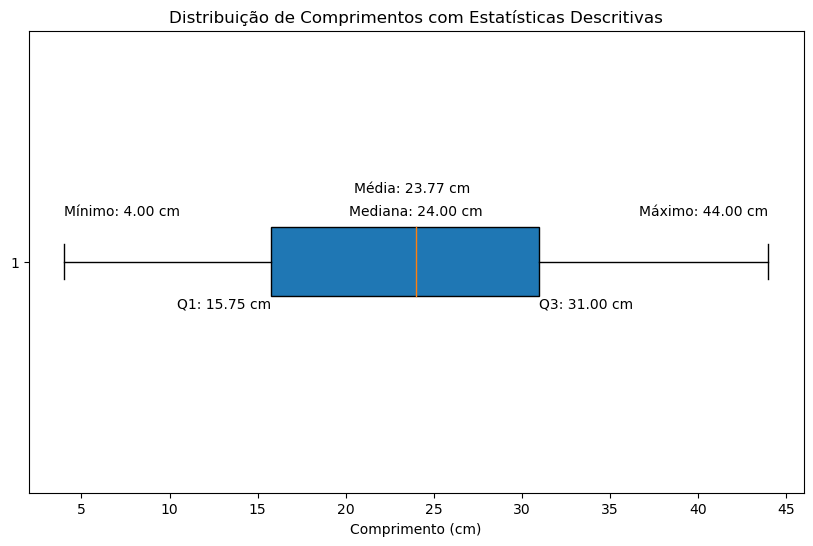

In [33]:
media = np.mean(comprimentos_limpos)
mediana = np.median(comprimentos_limpos)
minimo = np.min(comprimentos_limpos)
maximo = np.max(comprimentos_limpos)
q1, q2, q3 = np.percentile(comprimentos_limpos, [25, 50, 75])

plt.figure(figsize=(10, 6))
plt.boxplot(comprimentos_limpos, vert=False, patch_artist=True)
plt.xlabel('Comprimento (cm)')
plt.title('Distribuição de Comprimentos com Estatísticas Descritivas')

plt.text(maximo, 1.1, f'Máximo: {maximo:.2f} cm', fontsize=10, ha='right')
plt.text(minimo, 1.1, f'Mínimo: {minimo:.2f} cm', fontsize=10, ha='left')
plt.text(q1, 0.9, f'Q1: {q1:.2f} cm', fontsize=10, ha='right')
plt.text(q3, 0.9, f'Q3: {q3:.2f} cm', fontsize=10, ha='left')
plt.text(media, 1.15, f'Média: {media:.2f} cm', fontsize=10, ha='center')
plt.text(mediana, 1.1, f'Mediana: {mediana:.2f} cm', fontsize=10, ha='center')

plt.show()

Como podemos ver no boxplot a maior parte do comprimento dos produtos estão concentrados (50%) entre 17cm e 31cm. A média de comprimento está em 23.79cm, já a mediana em 23.75, então vemos a amostra de comprimentos dos produtos está bem distribuida, o que é explicado também pela ausência de outliers.

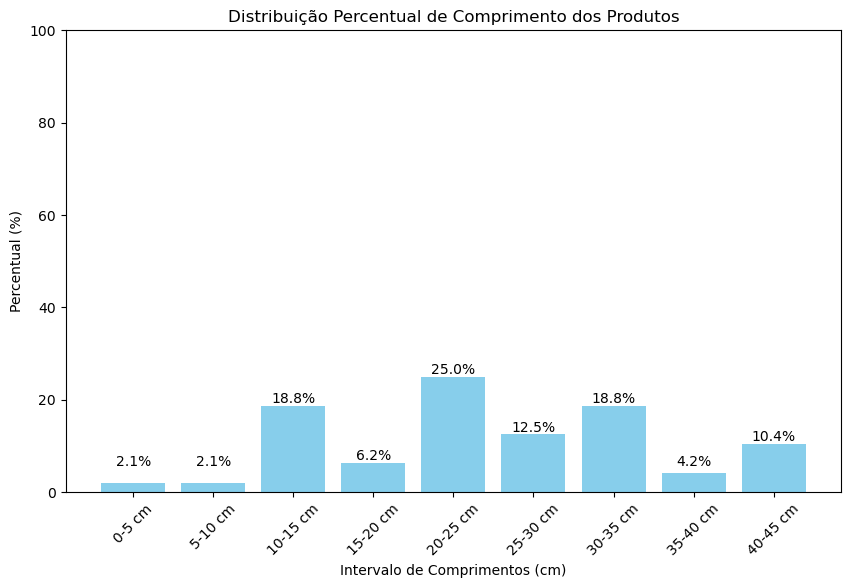

In [34]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

percentual_por_intervalo_comprimento, _ = np.histogram(comprimentos_limpos, bins=bins, density=False)

total_produtos_comprimento = len(comprimentos_limpos)

percentual_por_intervalo_comprimento = percentual_por_intervalo_comprimento / total_produtos_comprimento * 100

labels = [f'{bins[i]}-{bins[i+1]} cm' for i in range(len(bins)-1)]

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, percentual_por_intervalo_comprimento, color='skyblue')
plt.xlabel('Intervalo de Comprimentos (cm)')
plt.ylabel('Percentual (%)')
plt.title('Distribuição Percentual de Comprimento dos Produtos')
plt.ylim(0, 100) 

for bar, percentual in zip(bars, percentual_por_intervalo_comprimento):
    y_pos = max(bar.get_height(), 5) 
    plt.text(bar.get_x() + bar.get_width() / 2, y_pos,
             f'{percentual:.1f}%', ha='center', va='bottom')

plt.xticks(rotation=45) 
plt.show()

O que já foi mostrado no boxplot acima, aqui é ressaltado. Temos uma amostra de comprimento bem distribuida com uma maior concentração de comprimento em torno dos valores médios considerando o range de comprimento da amostra.

### 3.7 Títulos dos Anúncios

In [35]:
titulos = []
for t in consulta_ml['results']:
    titulo = resultado['title']
    titulos.append(titulo)
    
print(titulos)


len(titulos)

['Caixa Segredo Mini Cofre Porta Guarda Chave Senha Alterável Cor Preto', 'Caixa Segredo Mini Cofre Porta Guarda Chave Senha Alterável Cor Preto', 'Caixa Segredo Mini Cofre Porta Guarda Chave Senha Alterável Cor Preto', 'Caixa Segredo Mini Cofre Porta Guarda Chave Senha Alterável Cor Preto', 'Caixa Segredo Mini Cofre Porta Guarda Chave Senha Alterável Cor Preto', 'Caixa Segredo Mini Cofre Porta Guarda Chave Senha Alterável Cor Preto', 'Caixa Segredo Mini Cofre Porta Guarda Chave Senha Alterável Cor Preto', 'Caixa Segredo Mini Cofre Porta Guarda Chave Senha Alterável Cor Preto', 'Caixa Segredo Mini Cofre Porta Guarda Chave Senha Alterável Cor Preto', 'Caixa Segredo Mini Cofre Porta Guarda Chave Senha Alterável Cor Preto', 'Caixa Segredo Mini Cofre Porta Guarda Chave Senha Alterável Cor Preto', 'Caixa Segredo Mini Cofre Porta Guarda Chave Senha Alterável Cor Preto', 'Caixa Segredo Mini Cofre Porta Guarda Chave Senha Alterável Cor Preto', 'Caixa Segredo Mini Cofre Porta Guarda Chave Senha

50

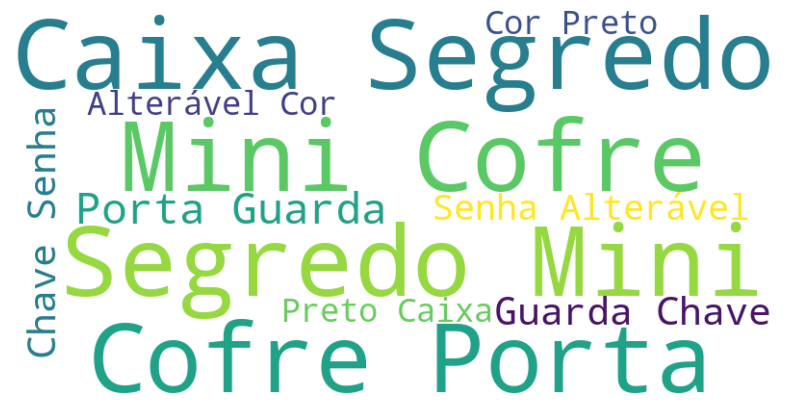

In [36]:
texto = ' '.join(titulos)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Oculta os eixos
plt.show()

Aqui conseguimos ver de forma lúdica, as principais palavras usadas como título do produto.

## 4. Conclusões

### 4.1 Sobre o formato dos dados

O arquivo é no formato JSON e acabei realizando o tratamento dele mantendo ele como dicionário. Há a possibilidade de parsear o documento e transformar em DF ou TXT, mas acabei não optando por esse caminho. Talvez poderia facilitar a análise. Vale aprofundar mais essa questão.

### 4.2 Sobre os dados analisados

Eu realizei a análise dos 50 produtos que são disponibilizados pelo documento via a API. Um ponto importante é destacar que nem todos os produtos tem algumas variáveis importantes preenchidas no documento da API do Mercado Livre.

E apesar da busca trazer 50 produtos, a busca tem um total de 10972 produtos anunciados. Seria interessante pensar numa forma de conseguir analisar de uma vez só uma quantidade maior de produtos anunciados a fim de ter uma amostragem mais completa e assim uma análise mais aprofundada sobre os produtos que são vendidos no Mercado Livre de acordo com determinada busca. 

Há uma parte no fim do documento em que há alguns filtros que são interessantes de serem analisados posteriormente. Há o percentual de desconto, filtro por marcas, por região do Brasil, faixa de preço, modo de pagamento (com juros e sem juros) e faixa de preço. Os filtros são sobre o número total de produtos (10972).

### 4.3 Sobre a análise

Fiz uma análise que aprofunda nas principais características dos produtos que são vendidos no Mercado Livre, que facilite ter uma visão mais descritiva dos diferentes produtos anunciados para uma determinada pesquisa, através das suas principais variáveis (cor, tamanho, peso, preço, título do anúncio, estoque e condição do produto)

### 4.4 Conclusão da análise

Sobre a pesquisa "Cofre" em específico, vemos que é um produto que tende a ter um valor mais baixo (em sua grande maioria até 300 reais), com um tamanho variado e em sua maioria com um menor peso. Os vendedores apostam na venda do produto novo e aparentemente a cor do produto não é uma preocupação dos vendedores (e provavelmente dos compradores também). Os vendedores tem apostado em um anúncio que destaca muito o aparelho ser eletrônico, digital e/ou automático.